In [1]:
import matplotlib
import networkx as nx
import pandas as pd

# 0. Define a graph visualization function.

In [2]:
def visualize_graph(graph):
    """ Generate visualization of graph.
    
    Parameters
    ----------
        graph: Networkx Graph object containing graph to visualize.
    
    Author: Miguel Agueda-Cabral
    """
    
    %matplotlib notebook
    pos = nx.random_layout(graph)
    nx.draw_networkx(graph, pos, with_labels=True, node_size=10)

## 1. Load up the directed multigraph. Make sure the node names are strings.

<IPython.core.display.Javascript object>


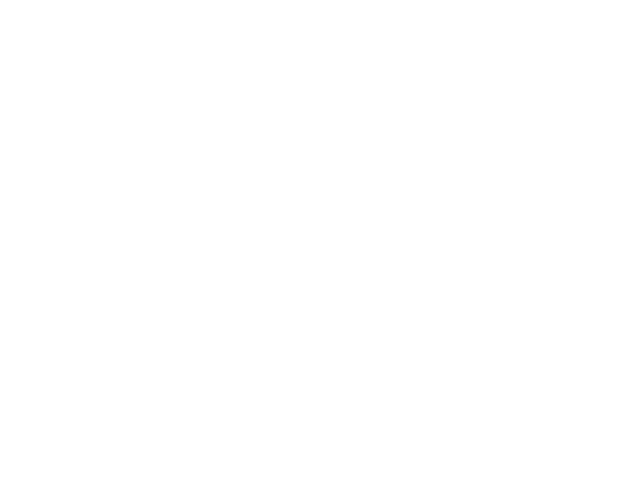

In [3]:
def load_multidigraph(path):
    """ Load a Directed Multigraph from a text file.
    
    Parameters
    ----------
        path: Path to text file containing data.
    
    Returns
    -------
        multidigraph: Networkx Directed Multigraph Object.
    
    Author: Miguel Agueda-Cabral
    """
    
    dataframe = pd.read_table(path, sep=' ', names=["From", "To", "Weight"], dtype=str)
    multidigraph = nx.from_pandas_edgelist(dataframe, "From", "To", edge_attr="Weight", create_using=nx.MultiDiGraph())
    
    return multidigraph, dataframe


multidigraph, dataframe = load_multidigraph("enron.txt")
visualize_graph(multidigraph)

## 2. How many unique sources did send an email? And how many emails were sent?

In [4]:
def n_unique_email_sources(dataframe):
    """ Compute the number of unique email sources within a data set.
    
    Parameters
    ----------
        dataframe: Pandas Dataframe object with email data.
    
    Returns
    -------
        n_sources: Integer number representing number of unique email sources.
        n_emails: Integer number representing number of emails sent.
        
    Author: Miguel Agueda-Cabral
    """
    
    from_set = set(dataframe["From"])  # Set contains no duplicate sources (unique).
    n_sources = len(from_set)  # Retrieve the size of unique email senders.
    n_emails = len(dataframe["From"])
    
    return n_sources, n_emails


n_sources, n_emails = n_unique_email_sources(dataframe)
print(F"There are {n_sources} unique email sources in the dataframe.")
print(F"There are {n_emails} emails represented in the dataframe.")

There are 146 unique email sources in the dataframe.
There are 266 emails represented in the dataframe.


## 3. Assume that information to and from the research institute can only be exchanged through emails, When an email is sent to someone inside the institute, a communication channel is created, allowing the sender to provide information to the receiver, but not vice versa. Based on the emails sent on the data, is it possible for information to go from every sender to every other receiver?

In [5]:
def fully_connected_one_way(multidigraph):
    """ Determine whether directed multigraph is fully connected.
    
    Parameters
    ----------
        multidigraph: Networkx Directed Multigraph representing email network.
    
    Returns
    -------
        fully_connected: Boolean result of network connection status.
            True: Network is fully connected.
            False: Network is not fully connected.
            
    Author: Miguel Agueda-Cabral
    """
    
    return nx.is_strongly_connected(multidigraph)


connected_status = fully_connected_one_way(multidigraph)
print(F"Graph is connected: {connected_status}")

Graph is connected: False


## 4. Now assume that a communication channel established by an email allows information to be exchanged both ways. Based on the emails sent on the data, is it possible for information to go from every sender to every other receiver?

In [6]:
def fully_connected_two_way(multidigraph):
    """ Determine whether undirected graph is fully connected.
    
    Parameters
    ----------
        multidigraph: Networkx Directed Multigraph representing email network.
    
    Returns
    -------
        fully_connected: Boolean result of undirected network connection status.
            True: Network is fully connected.
            False: Network is not fully connected.
            
    Author: Miguel Agueda-Cabral
    """
    
    undirected_graph = multidigraph.to_undirected()
    return nx.is_connected(undirected_graph)


undirected_connection_status = fully_connected_two_way(multidigraph)
print(F"Undirected graph is connected: {undirected_connection_status}")

Undirected graph is connected: True


## 5. How many nodes are in the largest (in terms of nodes) weakly connected component?

In [7]:
def size_largest_weak_component(digraph):
    """ Return the size of the largest weakly connected component in a graph.
    
    Parameters
    ----------
        digraph: Networkx Directed Graph.
    
    Returns
    -------
        n: Integer size of the largest weakly connected component.
        
    Author: Miguel Agueda-Cabral
    """
    
    largest_weak_component = max(nx.weakly_connected_components(digraph), key=len)
    n = len(largest_weak_component)
    
    return n


n_largest_weak_component = size_largest_weak_component(multidigraph)
print(F"There exists {n_largest_weak_component} nodes in the largest weakly connected component.")

There exists 151 nodes in the largest weakly connected component.


## 6. How many nodes are in the largest (in terms of nodes) strongly connected component?

In [8]:
def size_largest_strong_component(digraph):
    """ Return the size of the largest weakly connected component in a graph.
    
    Parameters
    ----------
        digraph: Networkx Directed Graph.
    
    Returns
    -------
        n: Integer size of the largest weakly connected component.
        
    Author: Edd Castillo
    """
    
    largest_strong_component = max(nx.strongly_connected_components(digraph), key=len)
    n = len(largest_strong_component)
    
    return n


n_largest_strong_component = size_largest_strong_component(multidigraph)
print(F"There exists {n_largest_strong_component} nodes in the largest strongly connected component.")

There exists 57 nodes in the largest strongly connected component.


## 7. Using the function subgraph, find the subgraph of nodes in a largest strongly connected component. Call this graph G_sc. How many nodes are in this graph? 

There are 57 nodes in G_sc.


<IPython.core.display.Javascript object>


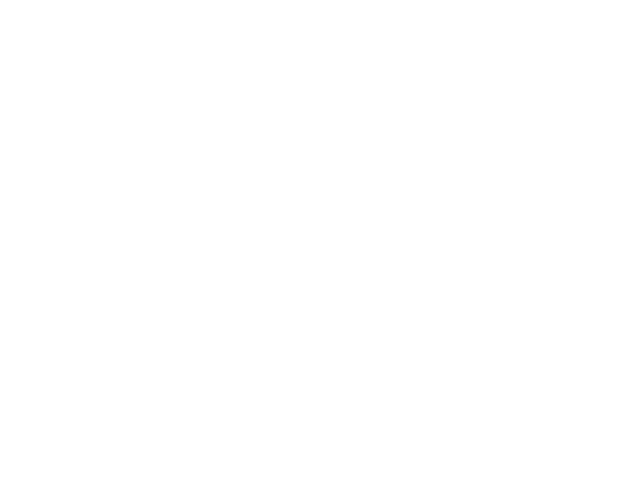

In [9]:
def subgraph_largest_strong_component(multidigraph):
    """ Generate a subgraph of the largest strongly connected component within a network.
    
    Parameters
    ----------
        multidigraph: Networkx Directed Multigraph.
    
    Returns
    -------
        G_sc: Subgraph containing largest strongly connected component.
    
    Author: Miguel Agueda-Cabral
    """
    
    largest_strong_component = max(nx.strongly_connected_components(multidigraph), key=len)
    G_sc = multidigraph.subgraph(largest_strong_component)
    
    return G_sc


G_sc = subgraph_largest_strong_component(multidigraph)
print(F"There are {nx.number_of_nodes(G_sc)} nodes in G_sc.")
visualize_graph(G_sc)

## 8. What is the average distance between nodes in G_sc?

In [10]:
def average_distance(graph):
    """ Compute the average distance between the nodes in a graph.
    
    Parameters
    ----------
        graph: Networkx Graph
    
    Returns
    -------
        d: Average distance between the nodes of `graph`.
    
    Author: Miguel Agueda-Cabral
    """
    
    d = nx.average_shortest_path_length(graph)
    
    return d


print(F"The nodes of G_sc have average distance of {average_distance(G_sc)}.")

The nodes of G_sc have average distance of 4.791666666666667.


## 9. What is the largest possible distance between two employees in G_sc?

In [11]:
def largest_distance(graph):
    """ Compute the largest distance between any two nodes in a graph.
    
    Parameters
    ----------
        graph: Networkx Graph.
    
    Returns
    -------
        d: Largest possible distance between two nodes in `graph`.
        
    Author: Edd Castillo
    """
    
    large_dist = nx.diameter(graph)
    
    return large_dist


print(F"The nodes of G_sc have the largest distance of {largest_distance(G_sc)}.")

The nodes of G_sc have the largest distance of 12.


## 10. What is the set of nodes in G_sc with eccentricity equal to the diameter?

In [12]:
def set_w_eccentricity_equal_to_diameter(graph):
    """ Find nodes within a graph which have eccentricity equal to diameter.
    
    Parameters
    ----------
        graph: Networkx Graph.
    
    Returns
    -------
        target_set: Set of nodes with eccentricity equal to diameter.
        
    Author: Edd Castillo
    """
    
    ecc_equal_to_diam = set(nx.periphery(graph))
    
    return ecc_equal_to_diam

print(F"The set of nodes in G_sc with eccentricity equal to the diameter is {set_w_eccentricity_equal_to_diameter(G_sc)}.")

The set of nodes in G_sc with eccentricity equal to the diameter is {'343253', '343120'}.


## 11. What is the set of node(s) in G_sc with eccentricity equal to the radius? How many nodes are connected to this node?

In [21]:
def set_w_eccentricity_equal_to_radius(graph):
    """ Find nodes within a graph which have eccentricity equal to radius.
    
    Parameters
    ----------
        graph: Networkx Graph.
    
    Returns
    -------
        target_set: Set of nodes with eccentricity equal to radius.
        n: Integer size of nodes returned.
        
    Author: Edd Castillo
    """
    
    ecc_equal_to_rad = set(nx.center(graph))
    n = len(ecc_equal_to_rad)
    
    return ecc_equal_to_rad, n


ecc_equal_to_rad, n = set_w_eccentricity_equal_to_radius(G_sc)
print(F"The {n} node(s) in G_sc with eccentricity equal to the radius is {ecc_equal_to_rad}.")

The 1 node(s) in G_sc with eccentricity equal to the radius is {'343119'}.


## 12. Which node in G_sc is connected to the most other nodes by a shortest path of length equal to the diameter of G_sc? How many nodes are connected to this node?

In [14]:
def most_connected_w_path_equal_to_diameter(graph):
    """ Find the node with the most connections of length equal to diameter of the graph.
    
    Parameters
    ----------
        graph: Networkx Graph.
    
    Returns
    -------
        node: Node with the most connections, satisfying conditions.
        n: Number of nodes connected to `node`.
        
    Author: Edd Castillo
    """
    
    large_dist = nx.diameter(graph)
    ecc_equal_to_diam = nx.periphery(graph)
    max_count = -1
    result_node = None
    for node in ecc_equal_to_diam:
        count = 0
        shortest_path = nx.shortest_path_length(graph, node)
        for key, value in shortest_path.items():
            if value == large_dist:
                #add count
                count +=1
            if count > max_count:
                result_node = node
                max_count = count
                
    return result_node, max_count
    

#returns the name of node and number of connected nodes
most_connected_node, connection_count = most_connected_w_path_equal_to_diameter(G_sc)
print(F"The node {most_connected_node} is connected to {connection_count} other node(s) by shortest path of length equal to diameter.")

The node 343253 is connected to 1 other node(s) by shortest path of length equal to diameter.


## 13. Suppose you want to prevent communication from flowing to the node that you found in the previous question from any node in the center of G_sc, what is the smallest number of nodes you would need to remove from the graph (you're not allowed to remove the node from the previous question or the center nodes)?

In [15]:
def prevent_comm_from_node_to_center(node, graph):
    """ Compute the number of nodes required to prevent communication between a node and the center of a graph.
    
    Parameters
    ----------
        node: Node to prevent from communicating with center of graph.
        graph: Graph containing `node`.
    
    Returns
    -------
        n: Number of nodes which need to be removed to prevent communications between `node` and the center of `graph`.
    
    Author: Edd Castillo and Miguel Agueda-Cabral
    """
    
    set_to_cut = set()  # Set contains no duplicates.
    center = set_w_eccentricity_equal_to_radius(graph)  # Get center nodes, may be more than 1.
    print(center)
    for center_node in center:
        set_to_cut.union(nx.minimum_node_cut(graph, s=node, t=center_node))
    
    return set_to_cut


set_to_cut = prevent_comm_from_node_to_center(most_connected_node, G_sc)
print(F"To prevent communication between {most_connected_node} and the center of G_sc, {len(set_to_cut)} nodes must be removed.")
# print(F"The nodes to be removed are {set_to_cut}.")

{'343119'}
To prevent communication between 343253 and the center of G_sc, 0 nodes must be removed.


## 14. Construct an undirected graph G_un using G_sc (you can ignore the attributes).

<IPython.core.display.Javascript object>


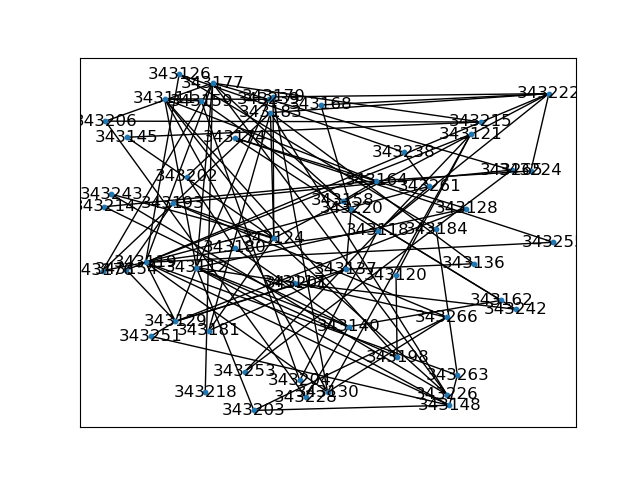

In [16]:
def make_undirected(digraph):
    """ Convert Directed Graph into an Undirected Graph.
    
    Parameters
    ----------
        digraph: Networkx Directed Graph to convert.
    
    Returns
    -------
        graph: Networkx Undirected Graph representation of input `digraph`.
    
    Author: Edd Castillo
    """
    
    G = size_largest_strong_component
    undirected_graph = G_sc.to_undirected(digraph)
    G_un = nx.Graph(undirected_graph)
    return G_un

G_un = make_undirected(G_sc)
visualize_graph(G_un)

## 15. What is the transitivity and average clustering coefficient of graph G_un?

In [17]:
print(F"The transitivity of G_un is {nx.transitivity(G_un)}")

The transitivity of G_un is 0.11214953271028037


In [18]:
print(F"The average clustering coefficient of G_un is {nx.average_clustering(G_un)}")

The average clustering coefficient of G_un is 0.12094017094017089
